In [1]:
"""
Script to test the SAMRAI data reader for one particular level of data.
"""

from floatpy.readers import samrai_reader
import numpy

%matplotlib inline
from matplotlib import pyplot as plt


In [2]:
"""
Get the SAMRAI data reader.
"""

data_reader = \
    samrai_reader.SamraiDataReader('/mnt/b9e17de4-9838-4425-ad4c-dc2ad3e41075/manlong/LANL_summer/' + \
                                  '2D_Poggi_Richtmyer_Meshkov_instability/2D_Poggi_Richtmyer_Meshkov_instability_1/' + \
                                  'viz_2D_Poggi_Richtmyer_Meshkov_instability/')


In [3]:
"""
Try to set a new step.
"""

step = data_reader.max_step - 1
data_reader.setStep(step)

basic_info = data_reader.getBasicInfo()
patch_extents = data_reader.getPatchExtents()
patch_map = data_reader.getPatchMap()


In [4]:
"""
Try to read the domain shape at particular levels.
"""

domain_shape_0 = data_reader.getDomainSizeAtOneLevel(0)
domain_shape_1 = data_reader.getDomainSizeAtOneLevel(1)

print domain_shape_0
print domain_shape_1


(1250, 125)
(2032, 500)


In [5]:
"""
Try to read one level of density and velocity data.
"""

var_names = ('density', 'velocity')
level_num = 0

data_reader.readDataAtOneLevel(var_names, level_num)

x_coords, y_coords, z_coords = data_reader.getCoordinatesAtOneLevel(level_num)
data_rho = data_reader.getData('density')
data_vel = data_reader.getData('velocity')

print data_rho.shape
print data_vel.shape

print numpy.isfortran(data_rho)
print numpy.isfortran(data_vel)


(1250, 125, 1)
(1250, 125, 2)
True
True


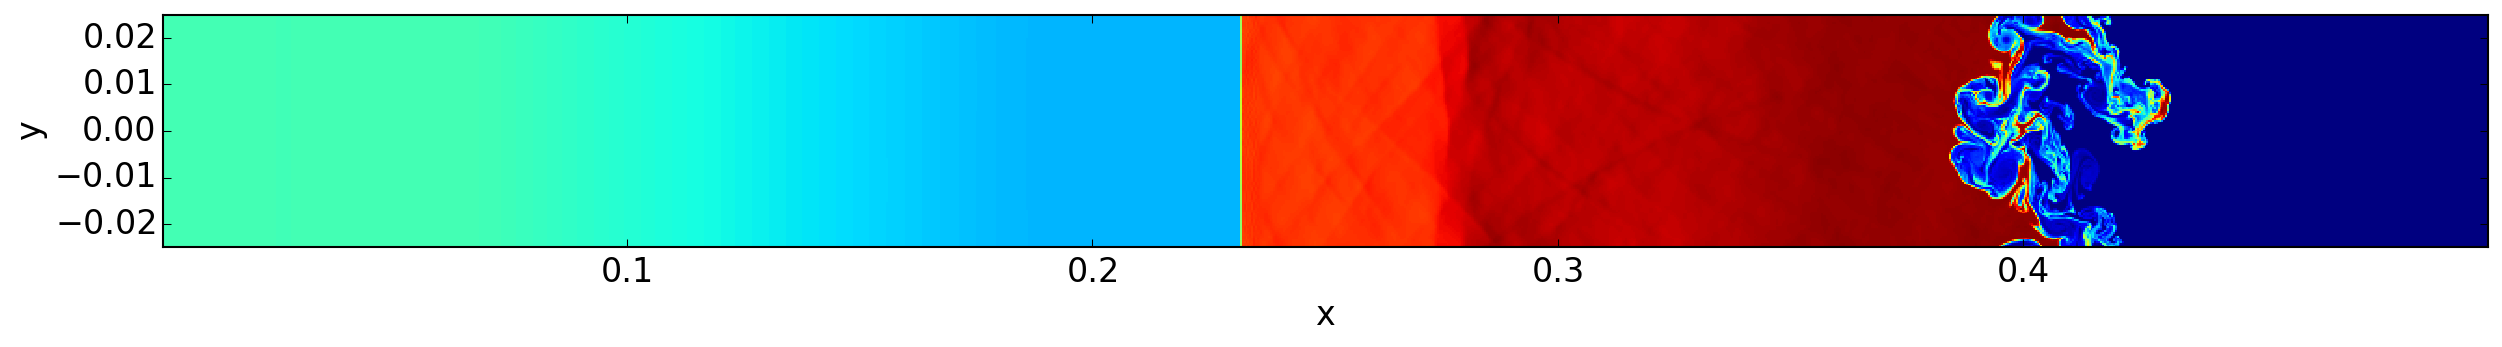

In [6]:
"""
Plot the level of data. (NAN for non-existing data)
"""

data_masked = numpy.ma.masked_where(numpy.isnan(data_rho), data_rho)
X, Y = numpy.meshgrid(x_coords, y_coords)

fig=plt.figure(figsize=(20, 2), dpi= 150)

if numpy.isfortran(data_masked):
    plt.pcolormesh(X, Y, data_masked[:, :, 0].T)
else:
    plt.pcolormesh(X, Y, data_masked[0, :, :].T)

plt.axes().set_aspect('equal', 'datalim')
plt.xlim([x_coords[0], x_coords[-1]])
plt.ylim([y_coords[0], y_coords[-1]])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
